# Clustering model

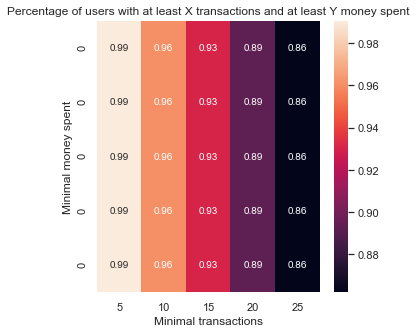

In [28]:
users_spent_money = defaultdict(int)
users_transactions = defaultdict(int)
for transaction in transactions:
    user = transaction.user_id
    users_transactions[user] += 1
    users_spent_money[user] += transaction.total

purchase_thresholds = [4, 6, 8, 10, 12] if DATASET == 'strauss' else [5, 10, 15, 20, 25]
money_thresholds = [500, 1000, 1500, 2000, 2500] if DATASET == 'strauss' else [0,0,0,0,0]

values = np.zeros((len(purchase_thresholds), len(money_thresholds)), dtype=float)
for i, p_treshold in enumerate(purchase_thresholds):
    for j, m_threshold in enumerate(money_thresholds):
        filtered_users = [k for k in users_spent_money.keys() if (users_spent_money[k]>=m_threshold) and (users_transactions[k]>=p_treshold)]
        #print(p_treshold, m_threshold, len(filtered_users), len(filtered_users)/len(users_spent_money))
        values[j][i] = len(filtered_users)/len(users_spent_money)

plt.figure(figsize=(5,5))
p = sns.heatmap(values, annot=True)
p.set_xlabel('Minimal transactions')
p.set_xticklabels(purchase_thresholds)
p.set_yticklabels(money_thresholds)
p.set_ylabel('Minimal money spent')
p.set_title('Percentage of users with at least X transactions and at least Y money spent')
plt.show()

In [29]:
MIN_PURCHASES = 12 if DATASET=='strauss' else 25
MIN_TOTAL = 2000 if DATASET=='strauss' else 0
filtered_users = [k for k in users_spent_money.keys() if (users_spent_money[k]>=MIN_TOTAL) and (users_transactions[k]>=MIN_PURCHASES)]
print('Users', len(filtered_users), '. Percentage of transactions covered', 100*sum([users_transactions[k] for k in filtered_users])/len(transactions))
filtered_users = sorted(filtered_users)

Users 2155 . Percentage of transactions covered 98.27078601293384


In [30]:
len(set([x.id for x in transactions]))

276484

In [31]:
len(transactions), len(filtered_users)

(276484, 2155)

In [32]:
user_embeddings = {u: np.zeros(100) for u in filtered_users}
user_vectors = {u: np.zeros(sum(LEVEL_SIZE[:-1])) for u in filtered_users}
for t in transactions:
    if t.user_id not in user_embeddings.keys():
        continue
    for product_index in t.indices:
        user_embeddings[t.user_id] += gensim_embeddings[product_index]
        p = products[product_index]
        user_vectors[t.user_id][p.hierarchy_indices[:-1]] += 1

In [35]:

with open(clustering_path, 'wb') as f:
    pickle.dump([np.vstack(list(user_embeddings.values())),np.vstack(list(user_vectors.values()))], f)